<a href="https://colab.research.google.com/github/pearlyn-r/projects/blob/chatgpt_vs_google_survey/chatgpt_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Necessary Packages

In [ ]:
!pip install fancyimpute

In [ ]:
!pip install scikit-posthocs

Importing Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
from fancyimpute import IterativeImputer
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import sklearn.linear_model as lm
import seaborn as sns
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,LeaveOneOut,KFold,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV

**Importing the survey data**

In [ ]:
df=pd.read_excel("chatgpt.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 18 columns):
 #   Column                                                                                                           Non-Null Count  Dtype         
---  ------                                                                                                           --------------  -----         
 0   Timestamp                                                                                                        167 non-null    datetime64[ns]
 1   What is your Gender?                                                                                             121 non-null    object        
 2   How old are you?                                                                                                 119 non-null    float64       
 3   What best describes your current position?                                                                       167 non-null    object        
 

In [ ]:
df.drop(df[df['Have you ever used ChatGPT before?'] == 'No'].index, inplace=True)

In [ ]:
df.isna().sum()
del df['Timestamp']

In [ ]:
df.columns=["Gender", "Age", "Position", "Q1","Q2", "Q3", "Q4","Q5", "Q6","Q7","Q8","Q9","Q10", "Q11","Q12", "Q13","Q14"]

<ipython-input-105-9cdb0de3b392>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(df['Position'].unique(), rotation=90, fontsize=10)


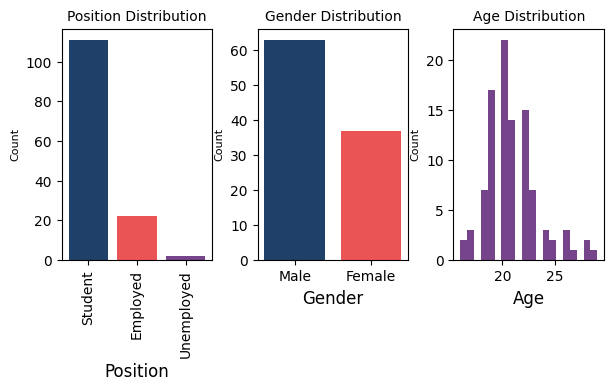

In [ ]:
import matplotlib.pyplot as plt

# Define color scheme
colors = ['#1f4068', '#ea5455', '#76448a']

# Set figure size and create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

# Plot Position distribution
axes[0].bar(df['Position'].unique(), df['Position'].value_counts(), color=colors)
axes[0].set_xticklabels(df['Position'].unique(), rotation=90, fontsize=10)
axes[0].set_xlabel('Position', fontsize=12)
axes[0].set_ylabel('Count', fontsize=8)
axes[0].set_title('Position Distribution', fontsize=10)

# Plot Gender distribution
axes[1].bar(['Male', 'Female'], df['Gender'].value_counts(), color=colors)
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Count', fontsize=8)
axes[1].set_title('Gender Distribution', fontsize=10)

# Plot Age distribution
axes[2].hist(df['Age'], bins=20, color=colors[2])
axes[2].set_xlabel('Age', fontsize=12)
axes[2].set_ylabel('Count', fontsize=8)
axes[2].set_title('Age Distribution', fontsize=10)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


**Performing Multiple Imputations to handle missing values**

In [ ]:
df1 = df.copy()
df1["Gender"] = df1["Gender"].apply(lambda x: 1 if x == "Male" else 0)
cols_with_missing = ["Gender", "Age"]

imputer = IterativeImputer()
df1[cols_with_missing] = imputer.fit_transform(df1[cols_with_missing])
df1["Gender"] = df1["Gender"].apply(lambda x: "Male" if x == 1 else "Female")

**Label Encoding the data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Q12'] = le.fit_transform(df1['Q12'])

In [ ]:
df1['Q1'].replace(['Yes','No'], [1,0], inplace=True)
df1['Q2'].replace(['Every day or more often', 'Two to six times a week', 'Once a week', 'Less than once a week', 'Never'], [4, 3, 2, 1, 0], inplace=True)
#df['Q3'].replace(['To get answers to specific questions', 'To generate new ideas', 'To learn new things', 'To have a conversation', 'To complete assignments/homework','To write code'], ['Answer_Q','Ideas','Learn','Conv','As_HW','Code'], inplace=True)
#df1['Q3'].str.split(',', expand=True)
df1['Q4'].replace(['Every day or more often', 'Two to six times a week', 'Once a week', 'Less than once a week', 'Never'], [4, 3, 2, 1, 0], inplace=True)
df1['Q5'].replace(['Every day or more often', 'Two to six times a week', 'Once a week', 'Less than once a week', 'Never'], [4, 3, 2, 1, 0], inplace=True)
df1['Q6'].replace(['Yes','No'], [1, 0], inplace=True) #dependent
df1['Q7'].replace(['Yes, ChatGPT has made it much easier to find the information I need.','Yes, ChatGPT has made it somewhat easier to find the information I need.','Neutral/Not sure','No, ChatGPT has not made it easier to find the information I need.','No, ChatGPT has actually made it more difficult to find the information I need.'], [4, 3, 2, 1, 0], inplace=True)
df1['Q8'].replace(['Very likely','Somewhat likely','Neutral/ Not sure','Somewhat unlikely','Very unlikely'], [4, 3, 2, 1, 0], inplace=True)
df1['Q9'].replace(['I would not be willing to pay anything to continue using ChatGPT.', '< 200 INR', '200-400 INR', '> 400 INR'], [0,1,2,3], inplace=True)
df1['Q10'].replace(['Yes','No'], [1,0], inplace=True)
df1['Q11'].replace(['Very important','Somewhat important','Neutral/ Not sure','Not very important','Not important at all'], [4, 3, 2, 1, 0], inplace=True)
df1["Q12"].replace([1,0], [0,1], inplace=True)
df1['Q13'].replace(['Yes, ChatGPT has had a very positive impact on my search for information online.', 'Yes, ChatGPT has had a somewhat positive impact on my search for information online.', 'Neutral/Not sure', 'No, ChatGPT has not had a positive impact on my search for information online.', 'No, ChatGPT has actually had a negative impact on my search for information online.'], [4, 3, 2, 1, 0], inplace=True)
df1['Q14'].replace(['I would be happy to use ChatGPT as my primary search engine.', 'I would miss Google but would be willing to use ChatGPT as my primary search engine.', 'Neutral/Not sure', 'I would be unhappy and would try to find an alternative search engine.', 'I would be very unhappy and would not use ChatGPT as my primary search engine.'], [4, 3, 2, 1, 0], inplace=True)

In [ ]:
df1

,Gender,Age,Position,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14
0,Male,18.0,Student,1,1,"To get answers to specific questions, To gener...",3,2,0,4,0,0,1,3,2,4,3
1,Male,17.0,Student,1,4,"To get answers to specific questions, To gener...",3,1,1,3,0,0,0,3,0,2,2
2,Male,21.0,Student,1,4,"To get answers to specific questions, To gener...",4,3,1,4,0,0,0,4,0,3,2
4,Male,19.0,Student,1,1,To complete assignments/homework,4,3,0,2,0,0,1,2,0,2,3
5,Male,23.0,Employed,1,2,"To get answers to specific questions, To write...",4,4,0,2,0,0,0,3,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Male,21.0,Student,1,4,"To get answers to specific questions, To write...",4,2,1,4,2,1,1,4,2,4,4
163,Female,21.0,Student,1,3,"To get answers to specific questions, To gener...",4,3,0,3,1,0,0,4,1,4,3
164,Female,21.0,Student,1,3,"To get answers to specific questions, To compl...",4,4,0,3,1,0,0,4,2,3,1
165,Male,19.0,Student,1,2,"To get answers to specific questions, To compl...",3,3,0,2,0,1,1,4,1,3,3


**Shapiro Test: Check for Normality of continuous data**

In [ ]:
data = df1['Age']
stat, p = stats.shapiro(data)
print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)

Shapiro-Wilk test statistic: 0.8917949199676514
p-value: 1.818869499459197e-08


*P-value significant, hence Age is NOT normally distributed*

**QQPlot: Check for the fit of the distribution and normality**

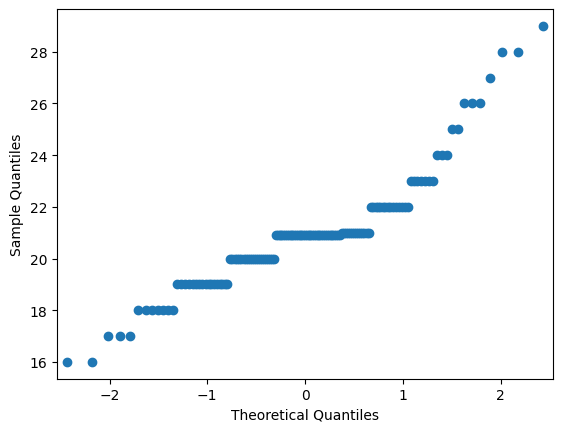

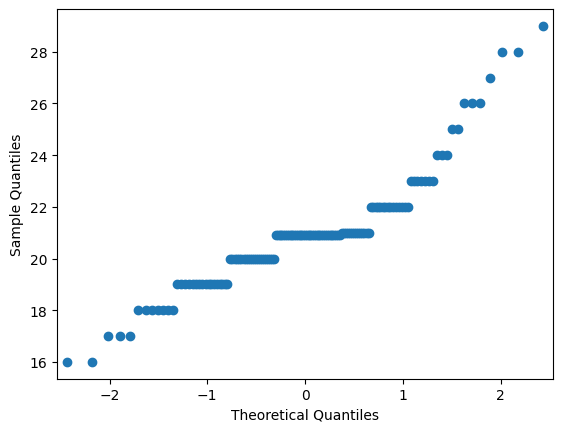

In [ ]:
import pylab
sm.qqplot(data)

*Plot is deviating from a straight line, hence not normally distributed*

**Skewness & Kurtosis**

In [ ]:
from scipy.stats import skew, kurtosis
skewness = skew(data)
kurt = kurtosis(data)
print("Skewness:", skewness)
print("Kurtosis:", kurt)

Skewness: 1.0941033311654866
Kurtosis: 2.6649518809478074


**Ploting the distribution**

Text(0, 0.5, 'Frequency')

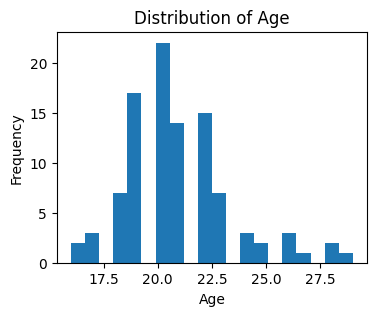

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.hist(df['Age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

**Levene Test: Check for homogenity of variance**

In [ ]:
from scipy.stats import levene

statistic, p_value = levene(df1['Q4'], df1['Q5'])
print("Levene's test statistic:", statistic)
print("p-value:", p_value)

Levene's test statistic: 15.981223922114049
p-value: 8.276438598208489e-05


In [ ]:
from scipy.stats import brownforsythe
statistic, p_value = brownforsythe(x, y)

# Print the test statistic and p-value
print("Brown-Forsythe test statistic: ", statistic)
print("p-value: ", p_value)

*P value significant,the groups have unequal variance
Therefore we cannot perform Parametric Tests and need to conduct Non-Parametric Tests*

**Wilcoxon Rank-Sum test: Alternative to paired-ttest**

In [ ]:
# Ho: Google usage before - Google usage since = 0
# Ha: Google usage before - Google usage since != 0

In [ ]:
from scipy.stats import wilcoxon
before = df1['Q4']
since = df1['Q5']
statistic, p_value = wilcoxon(before, since)

print("Wilcoxon signed-rank test statistic:", statistic)
print("p-value:", p_value)


Wilcoxon signed-rank test statistic: 146.5
p-value: 5.215475629335226e-07


*P value significant, hence the Google usage of our sample has been impacted due to the Presence of ChatGPT*

In [ ]:
before.median()

4.0

In [ ]:
since.median()

4.0

**Comparing the proportions of Google usage amongsnt daily users, before and after their introduction to ChatGPT**

In [ ]:
import numpy as np
from scipy.stats import binom

# Assume 'before' and 'after' are your data arrays

# Compute the proportion of maximum score attained in each group
prop_before = np.sum(before == 4) / len(before)
prop_after = np.sum(since == 4) / len(since)
n = len(before)
p_null = np.sum(before == 4) / n
se_null = np.sqrt(p_null * (1 - p_null) / n)
prop_null = binom.cdf(np.round(n * prop_after), n, p_null + se_null / 2)

# Perform one-sided hypothesis test
if prop_before > prop_null:
    print("The proportion of maximum score attained in ChatGPT usage was greater before the period.")
else:
    print("There was no significant difference in the proportion of maximum score attained in ChatGPT usage.")


The proportion of maximum score attained in ChatGPT usage was greater before the period.


**Kruskal-Wallis Test: Alternative to ANOVA, no dependency on normality or variance homogenity**

In [ ]:
from scipy.stats import kruskal
student_group = df1[df1['Position'] == 'Student']
employed_group = df1[df1['Position'] == 'Employed']
student=student_group['Q6']
employed=employed_group['Q6']
stat, p_value = kruskal(student,employed)

print("Kruskal-Wallis Test")
print(f"Test statistic: {stat:.3f}")
print(f"P-value: {p_value:.3f}")

Kruskal-Wallis Test
Test statistic: 4.014
P-value: 0.045


*P-value significant, hence there is a difference between the outlook of both Students and Employed when it comes to ChatGPT replacing Google as the primary source of information.*

**Logistic Regression**

In [ ]:
df2=df1
df2

,Gender,Age,Position,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14
0,Male,18.0,Student,1,1,"To get answers to specific questions, To gener...",3,2,0,4,0,0,1,3,2,4,3
1,Male,17.0,Student,1,4,"To get answers to specific questions, To gener...",3,1,1,3,0,0,0,3,0,2,2
2,Male,21.0,Student,1,4,"To get answers to specific questions, To gener...",4,3,1,4,0,0,0,4,0,3,2
4,Male,19.0,Student,1,1,To complete assignments/homework,4,3,0,2,0,0,1,2,0,2,3
5,Male,23.0,Employed,1,2,"To get answers to specific questions, To write...",4,4,0,2,0,0,0,3,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Male,21.0,Student,1,4,"To get answers to specific questions, To write...",4,2,1,4,2,1,1,4,2,4,4
163,Female,21.0,Student,1,3,"To get answers to specific questions, To gener...",4,3,0,3,1,0,0,4,1,4,3
164,Female,21.0,Student,1,3,"To get answers to specific questions, To compl...",4,4,0,3,1,0,0,4,2,3,1
165,Male,19.0,Student,1,2,"To get answers to specific questions, To compl...",3,3,0,2,0,1,1,4,1,3,3


*Replacing qualitative nulls with mode*

In [ ]:
mode=df2['Q3'].mode()[0]
df2['Q3'].fillna(value=mode, inplace=True)

*One-Hot Encoding *

In [ ]:
df2['Answer_Q'] = df2['Q3'].str.contains('answers', case=False).astype(int)
df2['Ideas'] = df2['Q3'].str.contains('ideas', case=False).astype(int)
df2['Learn'] = df2['Q3'].str.contains('learn', case=False).astype(int)
df2['Conv'] = df2['Q3'].str.contains('conversation', case=False).astype(int)
df2['Asign_HW'] = df2['Q3'].str.contains('complete', case=False).astype(int)
df2['Code'] = df2['Q3'].str.contains('code', case=False).astype(int)

In [ ]:
df2.info()
del df2['Q3']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 166
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    135 non-null    object 
 1   Age       135 non-null    float64
 2   Position  135 non-null    object 
 3   Q1        135 non-null    int64  
 4   Q2        135 non-null    int64  
 5   Q3        135 non-null    object 
 6   Q4        135 non-null    int64  
 7   Q5        135 non-null    int64  
 8   Q6        135 non-null    int64  
 9   Q7        135 non-null    int64  
 10  Q8        135 non-null    int64  
 11  Q9        135 non-null    int64  
 12  Q10       135 non-null    int64  
 13  Q11       135 non-null    int64  
 14  Q12       135 non-null    int64  
 15  Q13       135 non-null    int64  
 16  Q14       135 non-null    int64  
 17  Answer_Q  135 non-null    int64  
 18  Ideas     135 non-null    int64  
 19  Learn     135 non-null    int64  
 20  Conv      135 non-null    int64 

In [ ]:
df2=pd.get_dummies(df2,columns=['Gender','Position'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 166
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  135 non-null    float64
 1   Q1                   135 non-null    int64  
 2   Q2                   135 non-null    int64  
 3   Q4                   135 non-null    int64  
 4   Q5                   135 non-null    int64  
 5   Q6                   135 non-null    int64  
 6   Q7                   135 non-null    int64  
 7   Q8                   135 non-null    int64  
 8   Q9                   135 non-null    int64  
 9   Q10                  135 non-null    int64  
 10  Q11                  135 non-null    int64  
 11  Q12                  135 non-null    int64  
 12  Q13                  135 non-null    int64  
 13  Q14                  135 non-null    int64  
 14  Answer_Q             135 non-null    int64  
 15  Ideas                135 non-null    int

**Splitting into training and testing**

In [ ]:
X=df2.loc[:, df2.columns != 'Q6']
Y=df2['Q6']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

**Scaling continous variables**

In [ ]:
df2[["Age"]]=scale(df2[["Age"]],with_mean=True,with_std=True)
df2.head(2)

,Age,Q1,Q2,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Ideas,Learn,Conv,Asign_HW,Code,Gender_Female,Gender_Male,Position_Employed,Position_Student,Position_Unemployed
0,-1.346891,1,1,3,2,0,4,0,0,1,...,1,0,1,1,0,0,1,0,1,0
1,-1.811653,1,4,3,1,1,3,0,0,0,...,1,1,1,0,0,0,1,0,1,0


**K-fold cross validation on the initial model**

In [ ]:
logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
kfold5 = KFold(n_splits=10,random_state=1,shuffle=True)
test5 = cross_val_score(logreg,X,Y,cv=kfold5,scoring='accuracy',n_jobs=-1)
print(np.mean(test5))  #basic model

In [ ]:
df2.columns

Index(['Age', 'Q1', 'Q2', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Answer_Q', 'Ideas', 'Learn', 'Conv', 'Asign_HW',
       'Code', 'Gender_Female', 'Gender_Male', 'Position_Employed',
       'Position_Student', 'Position_Unemployed'],
      dtype='object')

**Model with all the variables**


*Dependent variable: Q6. Will ChatGPT replace Google as their primary source of information (Yes/No) (1/0)*

In [ ]:
lm=smf.logit('Q6~Age+Q1+Q2+Q4+Q5+Q7+Q8+Q9+Q10+Q11+Q12+Q13+Q14+Answer_Q+Ideas+Learn+Conv+Asign_HW+Code+Gender_Female+Gender_Male+Position_Employed+Position_Student+Position_Unemployed',data=df2).fit()
lm.summary()

         Current function value: 0.174437
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Q6   No. Observations:                  135
Model:                          Logit   Df Residuals:                      113
Method:                           MLE   Df Model:                           21
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                  0.6514
Time:                        02:32:38   Log-Likelihood:                -23.549
converged:                      False   LL-Null:                       -67.554
Covariance Type:            nonrobust   LLR p-value:                 3.549e-10
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -7.8680   1.34e+08  -5.87e-08      1.000   -2.63e+08    2.63e+08
Age                     0.2927      0.787      0.372      0.710      -1.250       1.836
Q1                     -7.8680   1.62e+08  -4.86e-08      1.000   -3.18e+08    3.18e+08
Q2                      2.0671      0.745      2.774      0.006       0.607       3.527
Q4                      0.4195      0.722      0.581      0.561      -0.995       1.834
Q5                     -2.0309      0.797     -2.548      0.011      -3.593      -0.469
Q7                      2.8575      0.976      2.927      0.003       0.944       4.771
Q8                      0.4086      0.442      0.925      0.355      -0.458       1.275
Q9                     -0.8649      0.755     -1.146      0.252      -2.344       0.614
Q10                     1.1961      0.946      1.264      0.206      -0.658       3.050
Q11                    -0.9475      0.882     -1.074      0.283      -2.677       0.782
Q12                    -0.2581      0.670     -0.385      0.700      -1.571       1.055
Q13                     0.9254      1.083      0.855      0.393      -1.197       3.048
Q14                     1.4557      0.588      2.475      0.013       0.303       2.608
Answer_Q               -1.5608      1.743     -0.896      0.370      -4.976       1.855
Ideas                   2.2403      1.305      1.716      0.086      -0.318       4.799
Learn                   0.4825      1.109      0.435      0.663      -1.691       2.656
Conv                   -0.0151      1.103     -0.014      0.989      -2.177       2.147
Asign_HW               -1.9199      1.246     -1.541      0.123      -4.362       0.522
Code                    0.4916      1.046      0.470      0.638      -1.559       2.542
Gender_Female          -3.6326      1.347     -2.697      0.007      -6.272      -0.993
Gender_Male            -4.2354   5.04e+06   -8.4e-07      1.000   -9.88e+06    9.88e+06
Position_Employed      -2.6590    9.9e+07  -2.69e-08      1.000   -1.94e+08    1.94e+08
Position_Student        3.9415    9.9e+07   3.98e-08      1.000   -1.94e+08    1.94e+08
Position_Unemployed    -9.1504    9.9e+07  -9.24e-08      1.000   -1.94e+08    1.94e+08
=======================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Best model with all significant p-values**

Q2. Their frequency of ChatGPT usage

Q5. Their frequency of Google usage since ChatGPT

Q7. Can they find information more easily on ChatGPT as compared to Google

Q14. How would they feel if ChatGPT replaced Google.

In [ ]:
lm=smf.logit('Q6~Q2+Q5+Q7+Q14',data=df2).fit()
lm.summary()

Optimization terminated successfully.
         Current function value: 0.241952
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Q6   No. Observations:                  135
Model:                          Logit   Df Residuals:                      130
Method:                           MLE   Df Model:                            4
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                  0.5165
Time:                        02:32:38   Log-Likelihood:                -32.663
converged:                       True   LL-Null:                       -67.554
Covariance Type:            nonrobust   LLR p-value:                 2.524e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6895      2.794     -3.826      0.000     -16.165      -5.214
Q2             1.4351      0.416      3.450      0.001       0.620       2.250
Q5            -1.1655      0.356     -3.277      0.001      -1.863      -0.469
Q7             2.0984      0.597      3.516      0.000       0.929       3.268
Q14            0.6955      0.335      2.075      0.038       0.039       1.352
==============================================================================
"""

In [ ]:

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

K-fold Accuracy on the best model

In [ ]:
X = df2[['Q2', 'Q5', 'Q7', 'Q14']]
Y=df2['Q6']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
kfold5 = KFold(n_splits=10,random_state=1,shuffle=True)
test5 = cross_val_score(logreg,X,Y,cv=kfold5,scoring='accuracy',n_jobs=-1)
print(np.mean(-test5))

-0.8884615384615385


**Comparing our Logistic Regression model with Advanced model techniques.**

**Gaussian NB**

In [ ]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, Y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,Y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.80      0.89         5

    accuracy                           0.96        27
   macro avg       0.98      0.90      0.93        27
weighted avg       0.96      0.96      0.96        27

[[22  0]
 [ 1  4]]
Gaussian Naive Bayes accuracy: 96.30%


**Decision Tree**

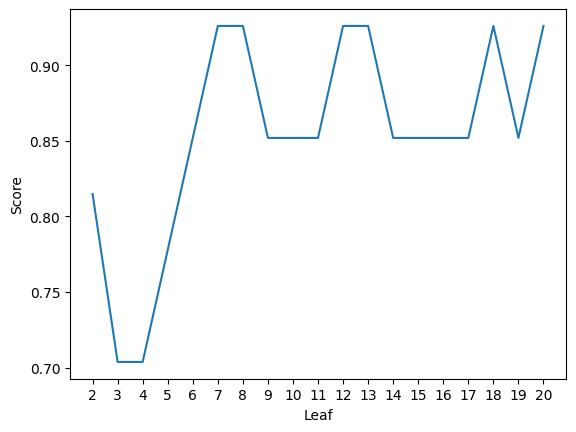

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.80      0.80      0.80         5

    accuracy                           0.93        27
   macro avg       0.88      0.88      0.88        27
weighted avg       0.93      0.93      0.93        27

Decision Tree Accuracy: 92.59%


In [ ]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, Y_train)
    scoreListDT.append(DTclassifier.score(X_test, Y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
Y_pred = DTclassifier.predict(X_test)
report = classification_report(Y_test, Y_pred)
print(report)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

**Random Forest**

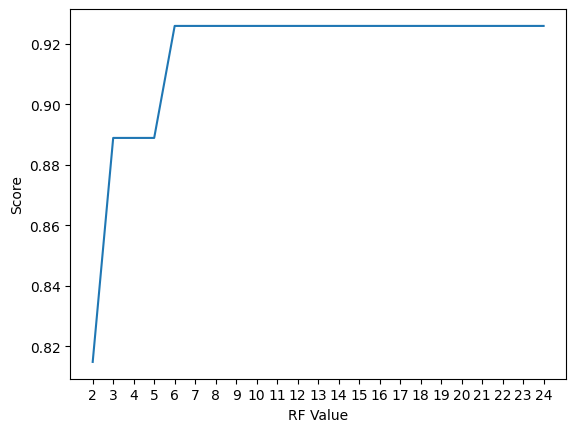

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.60      0.75         5

    accuracy                           0.93        27
   macro avg       0.96      0.80      0.85        27
weighted avg       0.93      0.93      0.92        27

Random Forest Accuracy:  92.59%


In [ ]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, Y_train)
    scoreListRF.append(RFclassifier.score(X_test, Y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
Y_pred = RFclassifier.predict(X_test)
report = classification_report(Y_test, Y_pred)
print(report)
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

**Accuracy Comparison**

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression',
                                  'Gaussian NB', 'Decision Tree',
                                  'Random Forest'],
                        'Accuracy': [(np.mean(test5))*100, NBAcc2*100, DTAcc*100,
                                     RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Gaussian NB,96.296296
2,Decision Tree,92.592593
3,Random Forest,92.592593
0,Logistic Regression,88.846154


**Comparing Accuracies after K-fold Cross Validation**

In [ ]:
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
# Compute accuracy scores for each classifier using k-fold cross-validation
LRscores = cross_val_score(logreg, X, Y, cv=kfold)
RFscores = cross_val_score(RFclassifier, X, Y, cv=kfold)
DTscores = cross_val_score(DTclassifier, X, Y, cv=kfold)
NBscores = cross_val_score(NBclassifier2, X, Y, cv=kfold)


In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Decision Tree', 'Gaussian NB'],
                        'KFOLD Accuracy': [LRscores.mean(), RFscores.mean(), DTscores.mean(), NBscores.mean()],
                        'KFOLD Std': [LRscores.std() * 2, RFscores.std() * 2, DTscores.std() * 2, NBscores.std() * 2]
                       })
compare['KFOLD Accuracy'] = compare['KFOLD Accuracy'].apply(lambda x: "{:.2f}%".format(x * 100))
compare['KFOLD Std'] = compare['KFOLD Std'].apply(lambda x: "{:.2f}%".format(x * 100))
compare

,Model,KFOLD Accuracy,KFOLD Std
0,Logistic Regression,88.85%,15.53%
1,Random Forest,86.65%,16.32%
2,Decision Tree,84.34%,14.55%
3,Gaussian NB,88.24%,14.86%


**Extra Regression model for Willingness to pay**

In [ ]:
X=df2.loc[:, df2.columns != 'Q8']
Y=df2['Q8']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
logreg = LogisticRegression(multi_class='multinomial',penalty='l2', solver='lbfgs', max_iter=1000)
kfold5 = KFold(n_splits=10,random_state=1,shuffle=True)
test5 = cross_val_score(logreg,X,Y,cv=kfold5,scoring='accuracy',n_jobs=-1)
print(np.mean(-test5))

-0.3423076923076923


In [ ]:
X=df2[['Age','Q9','Q5','Conv']]
Y=df2['Q8']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
#mdl = sm.MNLogit(Y, X)
#mdl_fit = mdl.fit()
#print (mdl_fit.summary())

In [ ]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, Y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,Y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.38      0.62      0.48         8
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.17      1.00      0.29         1

    accuracy                           0.41        27
   macro avg       0.24      0.41      0.25        27
weighted avg       0.40      0.41      0.37        27

[[5 5 0 0 2]
 [2 5 0 0 1]
 [1 1 0 0 1]
 [0 2 0 0 1]
 [0 0 0 0 1]]
Gaussian Naive Bayes accuracy: 40.74%


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


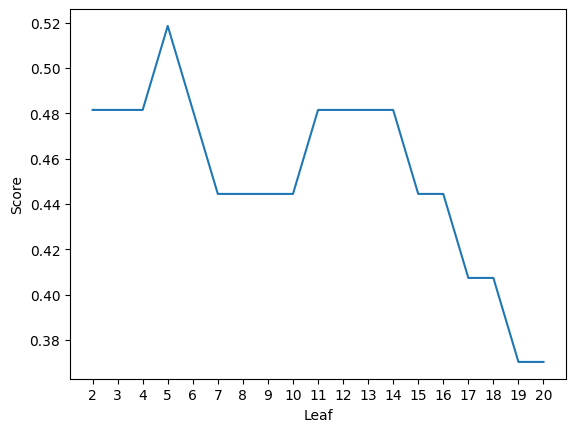

              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         3
           3       0.67      0.67      0.67         3
           4       0.00      0.00      0.00         1

    accuracy                           0.37        27
   macro avg       0.26      0.27      0.26        27
weighted avg       0.35      0.37      0.36        27

Decision Tree Accuracy: 51.85%


In [ ]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, Y_train)
    scoreListDT.append(DTclassifier.score(X_test, Y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
Y_pred = DTclassifier.predict(X_test)
report = classification_report(Y_test, Y_pred)
print(report)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

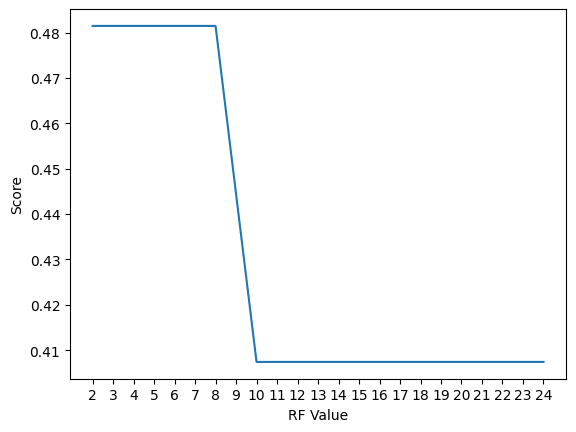

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.50      0.12      0.20         8
           2       0.20      0.33      0.25         3
           3       0.33      0.33      0.33         3
           4       0.00      0.00      0.00         1

    accuracy                           0.41        27
   macro avg       0.34      0.29      0.29        27
weighted avg       0.50      0.41      0.42        27

Random Forest Accuracy:  48.15%


In [ ]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, Y_train)
    scoreListRF.append(RFclassifier.score(X_test, Y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
Y_pred = RFclassifier.predict(X_test)
report = classification_report(Y_test, Y_pred)
print(report)
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))